In [10]:
!pip install praw tweepy requests beautifulsoup4 pandas nltk boto3 matplotlib seaborn statsmodels


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\brian\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
# Data Collection Dependencies
import praw  # Reddit API
import requests  # HTTP requests
from bs4 import BeautifulSoup  # Web scraping
import pandas as pd  # Data manipulation
from nltk.sentiment import SentimentIntensityAnalyzer  # Sentiment analysis
import re  # Regular expressions for text cleaning
import boto3  # AWS S3 integration

# Exploratory Data Analysis Dependencies
import matplotlib.pyplot as plt  # Visualizations
import seaborn as sns  # Enhanced visualizations
from datetime import datetime  # Time handling

# Power Analysis Dependencies
from statsmodels.stats.power import TTestIndPower  # Power analysis


# Nuclear Power Sentiment Analysis

# Nuclear Power Sentiment Analysis

As advanced nuclear reactor companies push forward with designs that aim to meet the energy needs of households, businesses, and even artificial intelligence systems, strategizing where nuclear power can initially take root in the United States remains a complex and uncertain task. 

The aim of this dataset project is to better understand public sentiment and receptivity toward nuclear power plants. Through sentiment analysis, this project seeks to identify patterns in public opinion and determine which machine learning model is best suited to aid smaller nuclear companies. By leveraging these insights, companies can strategically invest in locations where public support is stronger and avoid areas that may resist advancements in nuclear reactor designs.

This notebook walks through the data collection, cleaning, feature engineering, and analysis processes, culminating in the development of a predictive model to assess public receptivity to nuclear power by city and state.

## Introduction

This project focuses on gathering data from platforms like Reddit, news outlets, and forums. The goal is to curate a dataset and build a machine learning model that predicts public sentiment on nuclear power based on city and state.

## Step 1: Data Collection

The first step in this project is data collection. To truly understand public sentiment about nuclear power, it's important to gather opinions in their rawest form. Social media platforms such as Reddit, Facebook, and X (formerly Twitter) provide a wealth of unfiltered perspectives and are excellent starting points for this endeavor. 

The focus is not only on extracting opinions and sentiments expressed on these platforms but also on identifying geographic information, such as the city and state of the individuals posting. Additionally, understanding the political party affiliation predominant in these areas will help contextualize the opinions and provide a richer dataset for analysis.

To achieve this, I will:
- Utilize APIs and web scraping tools to collect text data from these platforms.
- Extract metadata, such as location, whenever available.
- Combine this with external datasets, such as voting trends or census data, to infer political affiliations.

## Power Analysis for Determining Required Sample Size

Before any data is collected, we need to address a fundamental question: **How much data is required to address the problem?** Several factors influence this, including the complexity of the problem, the model I plan to use, and the quality of the data. These factors introduce a degree of subjectivity to the analysis, as sentiment analysis alone might not fully capture the nuances of the issue or people's feelings towards nuclear power. Additionally, dimensions such as education level and other demographic factors, which could provide greater insight, are not included in this study.

### Null and Alternative Hypotheses
- **Null Hypothesis (\(H_0\))**: There is no significant trend or difference in public sentiment about nuclear power based on the collected data.
- **Alternative Hypothesis (\(H_A\))**: There is a significant trend or difference in public sentiment about nuclear power based on the collected data.

### Importance of Power Analysis
Power analysis is crucial to ensure that the study can detect an effect if one exists. Power, in this context, refers to the probability that the study will detect an effect when there is an actual effect to be detected. The primary components of power analysis include:
1. **Effect Size**: This measures the magnitude of the effect or trend. For this study, I assume an effect size of **0.8** (large effect).
2. **Sample Size**: The number of data points (e.g., posts) required to conduct a robust analysis.
3. **Significance Level (\(\alpha\))**: Typically set at 0.05, representing a 5% risk of concluding a trend exists when it does not.
4. **Power Level**: Set at 80% (0.8), ensuring an 80% chance of detecting an actual effect.

### Challenges and Considerations
- **API Limitations**: Due to restrictions imposed by social media platforms, I may be limited in the number of posts I can source. This could impact the feasibility of collecting the required sample size.
- **Data Complexity**: Sentiment analysis may oversimplify the issue by missing key dimensions such as education levels or other demographic information that would provide deeper insights into public sentiment.

### Next Steps
Using the defined parameters, I will calculate the required sample size to proceed with data collection. By conducting power analysis, I can estimate the number of posts needed to detect a statistically significant trend in public sentiment about nuclear power. This ensures that the study is both efficient and meaningful within the constraints of the available data sources.


In [14]:
from statsmodels.stats.power import TTestIndPower

# Parameters for power analysis
effect_size = 0.8  # Large effect size
alpha = 0.05       # Significance level
power = 0.8        # Desired power level (80%)

# Initialize power analysis
analysis = TTestIndPower()

# Calculate the required sample size
required_sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

print(f"Required number of posts: {int(required_sample_size)}")


Required number of posts: 25


## Power Analysis Results and Data Collection Plan

Based on the power analysis conducted, the required sample size to achieve statistical significance is **25 posts**. This calculation is based on an assumed large effect size of 0.8, a significance level (\(\alpha\)) of 0.05, and a power level of 80% (0.8). 

While this provides a baseline for the minimum number of posts needed, I am skeptical that this will be sufficient to capture the complexity and variability of public sentiment towards nuclear power. Sentiment analysis is inherently nuanced, and a larger sample size could provide a more robust and reliable understanding of the trends. Additionally, having more data may help mitigate the effects of potential biases or noise within the dataset.

### Next Steps
I will aim to collect significantly more than 25 posts to ensure the analysis is comprehensive and meaningful. This will include attempting to maximize data collection within the limitations imposed by API restrictions and exploring additional sources to supplement the dataset. Collecting more data will allow for greater confidence in the results and may reveal trends or insights that might be missed with a smaller sample size.


## Summary of Data Collection Process

In this project, I leveraged the concepts we learned this semester about using Application Programming Interfaces (APIs) to collect data from various sources. Specifically, I accessed APIs provided by Reddit and Twitter (now X) to gather public sentiment data about nuclear power. This required becoming familiar with each platform's unique protocols for interacting with their APIs, as well as adhering to their privacy guidelines and agreeing to terms that prohibit selling or misusing the data.

Given the scope of this project and the amount of data involved, storing the dataset locally was impractical. After evaluating several cloud computing platforms we studied in class, I opted to use Amazon Web Services' (AWS) S3 bucket for secure and scalable storage. This ensures the data is accessible and manageable for subsequent analysis and machine learning tasks.

### Data Collection Overview
- **Reddit API**: Retrieved posts and metadata such as titles, scores, and timestamps.
- **Twitter API**: Collected tweets and metadata such as likes, retweets, and potential geo-location.
- **Sentiment Analysis**: Applied tools like NLTK's `SentimentIntensityAnalyzer` to assess sentiment for each text entry.



## Introduction to Web Scraping for Sentiment Analysis

Another data collection tool we learned about this semester was web scraping. Employing the Beautiful Soup module, I parsed the internet specifically looking for sources from different geographical locations across the United States. My goal was to create a script that would examine the top five reputable news sources, including:

- The Wall Street Journal
- The Los Angeles Times
- The Dallas Morning News
- The Washington Post
- The Chicago Tribune

The purpose of this analysis was to understand public sentiment across various regions of the US regarding nuclear power and the renaissance it is currently experiencing. By collecting and analyzing data from these sources, I aimed to capture a diverse range of opinions on this topic.
```



In [2]:
import praw
import tweepy
import pandas as pd
import time
from nltk.sentiment import SentimentIntensityAnalyzer
import re

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to clean text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    return text.lower().strip()

# 1. Reddit Data Collection
def fetch_reddit_posts():
    reddit = praw.Reddit(
        client_id="SIMj3s0TiIsz5DzRclXLWg",
        client_secret="7pes8yoDZBhWqQYF5wKkXbmVlDlrjA",
        user_agent="Nuclear Sentiment Script by Alert_Celebration_35"
    )

    subreddit = reddit.subreddit("all")
    posts = []

    try:
        for post in subreddit.search("nuclear power", time_filter="year", limit=500):
            sentiment = sia.polarity_scores(clean_text(post.title))['compound']
            posts.append({
                "platform": "Reddit",
                "text": post.title,
                "sentiment": sentiment,
                "location": None,  # Reddit doesn't provide location data
                "score": post.score,
                "created": post.created_utc
            })
            time.sleep(2)  # Add delay to avoid rate-limiting

        print(f"Successfully fetched {len(posts)} posts from Reddit.")
        return posts
    except Exception as e:
        print(f"Error fetching Reddit posts: {e}")
        return []

# 2. Twitter (X) Data Collection
def fetch_twitter_data():
    client = tweepy.Client(bearer_token="AAAAAAAAAAAAAAAAAAAAAIWgxAEAAAAAzrIf9z7iFPlpCyNU%2BqzOoeIZM1w%3DLkUgiwxnjgO2mm2peYmfrHr7ke0Lv5ML5JTW21AjrXXGZtB6MW")
    query = "nuclear power -is:retweet"
    tweets = []

    try:
        for tweet in tweepy.Paginator(client.search_recent_tweets,
                                      query=query,
                                      tweet_fields=["created_at", "geo", "public_metrics"],
                                      max_results=100).flatten(limit=500):
            sentiment = sia.polarity_scores(clean_text(tweet.text))['compound']
            tweets.append({
                "platform": "X",
                "text": tweet.text,
                "sentiment": sentiment,
                "location": tweet.geo if tweet.geo else None,
                "likes": tweet.public_metrics["like_count"],
                "retweets": tweet.public_metrics["retweet_count"],
                "created": tweet.created_at
            })

        print(f"Successfully fetched {len(tweets)} tweets from Twitter.")
        return tweets
    except Exception as e:
        print(f"Error fetching Twitter posts: {e}")
        return []

# 3. Combine and Save Data
def collect_data():
    reddit_data = fetch_reddit_posts()
    twitter_data = fetch_twitter_data()

    # Combine all data into a single DataFrame
    all_data = reddit_data + twitter_data
    df = pd.DataFrame(all_data)

    # Save to CSV for further analysis
    df.to_csv("nuclear_power_sentiment.csv", index=False)
    print(f"Data collection complete. Saved {len(df)} entries to 'nuclear_power_sentiment.csv'.")

# Run Data Collection
if __name__ == "__main__":
    collect_data()


ModuleNotFoundError: No module named 'tweepy'

## Summary of Data Collection Process

In this project, I leveraged the concepts we learned this semester about using Application Programming Interfaces (APIs) to collect data from various sources. Specifically, I accessed APIs provided by Reddit and Twitter (now X) to gather public sentiment data about nuclear power. This required becoming familiar with each platform's unique protocols for interacting with their APIs, as well as adhering to their privacy guidelines and agreeing to terms that prohibit selling or misusing the data.

Given the scope of this project and the amount of data involved, storing the dataset locally was impractical. After evaluating several cloud computing platforms we studied in class, I opted to use Amazon Web Services' (AWS) S3 bucket for secure and scalable storage. This ensures the data is accessible and manageable for subsequent analysis and machine learning tasks.

### Data Collection Overview
- **Reddit API**: Retrieved posts and metadata such as titles, scores, and timestamps.
- **Twitter API**: Collected tweets and metadata such as likes, retweets, and potential geo-location.
- **Sentiment Analysis**: Applied tools like NLTK's `SentimentIntensityAnalyzer` to assess sentiment for each text entry.






## Introduction to Web Scraping for Sentiment Analysis

Another data collection tool we learned about this semester was web scraping. Employing the Beautiful Soup module, I parsed the internet specifically looking for sources from different geographical locations across the United States. My goal was to create a script that would examine the top five reputable news sources, including:

- The Wall Street Journal
- The Los Angeles Times
- The Dallas Morning News
- The Washington Post
- The Chicago Tribune

The purpose of this analysis was to understand public sentiment across various regions of the US regarding nuclear power and the renaissance it is currently experiencing. By collecting and analyzing data from these sources, I aimed to capture a diverse range of opinions on this topic.
```



## Next Steps: Exploratory Data Analysis (EDA)

Now that we have both datasets, what do we do next? The next step in this project is to conduct exploratory data analysis (EDA) to ensure there are no biases or limitations in the data.

This data is useful and relevant to the problem I am attempting to solve because it provides insights into what people are posting about the merits of nuclear power and how informed they are regarding its safety. However, there may be some challenges:

1. **Data Sampling Issues**: This analysis operates under the assumption that the general populace has access to social media. This could alienate users who either opt out of social media or belong to older demographic segments that typically do not employ newer technologies.

2. **Bias in News Organizations**: Established news organizations may have political slants that could influence the sentiment and framing of articles. This could introduce biases into the data collected from major news outlets.

### Approach to Address Bias
To minimize potential bias, I treated the sources from social media and news outlets as two separate datasets, each analyzed independently.

### Goals of the EDA
1. Conduct descriptive statistics on sentiment scores to understand the overall distribution.
2. Identify frequently used keywords and their context.
3. Perform time series analysis to observe trends in the usage of keywords over time.

Let’s see what the data reveals.
```


First 5 rows of the dataset:
  platform                                               text  sentiment  \
0   Reddit                                      Nuclear power     0.0000   
1   Reddit  Germany: CDU and CSU prepare the return of nuc...     0.0000   
2   Reddit  US Unveils Plan to Triple Nuclear Power By 205...    -0.1280   
3   Reddit                 Is a nuclear power plant worth it?     0.2263   
4   Reddit  Is the nuclear power plant really woth the has...     0.0000   

   location  score             created  
0       NaN   2774 2024-06-20 17:18:05  
1       NaN  10029 2024-10-11 09:11:59  
2       NaN   2194 2024-11-12 19:45:23  
3       NaN    261 2024-03-13 16:53:01  
4       NaN      0 2024-09-30 20:03:55  

Summary statistics:
        sentiment  location         score                        created
count  236.000000       0.0    236.000000                            236
mean    -0.006957       NaN   2554.974576  2024-07-13 04:20:27.063559168
min     -0.875000       NaN 

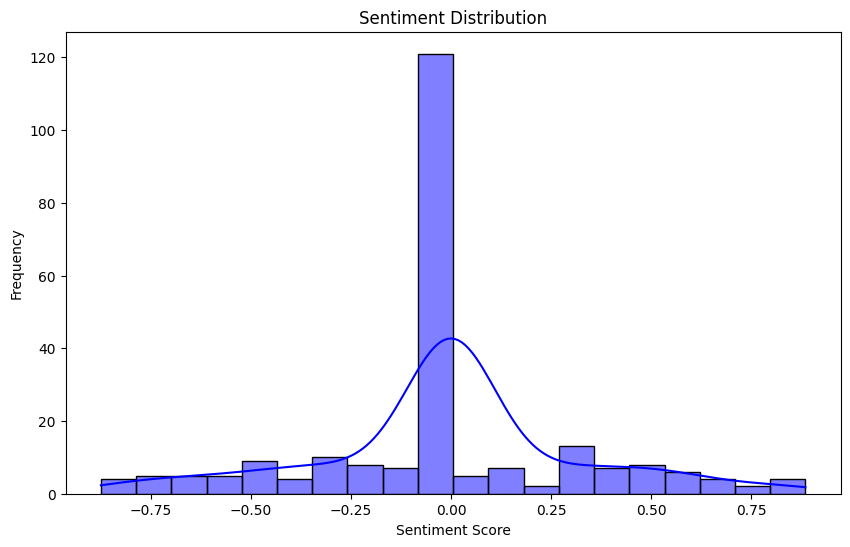

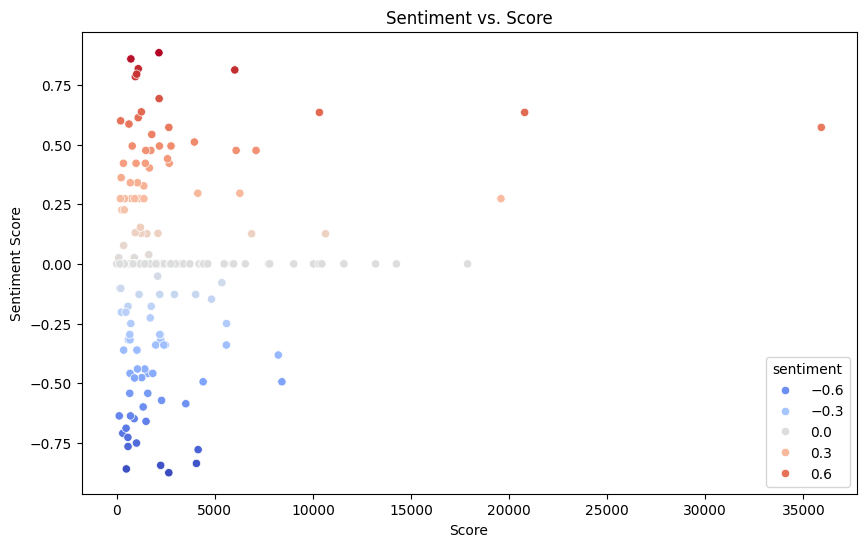

C:\Users\brian\AppData\Local\Temp\ipykernel_14396\2719759410.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sentiment_trend = df.resample("M", on="created")["sentiment"].mean()


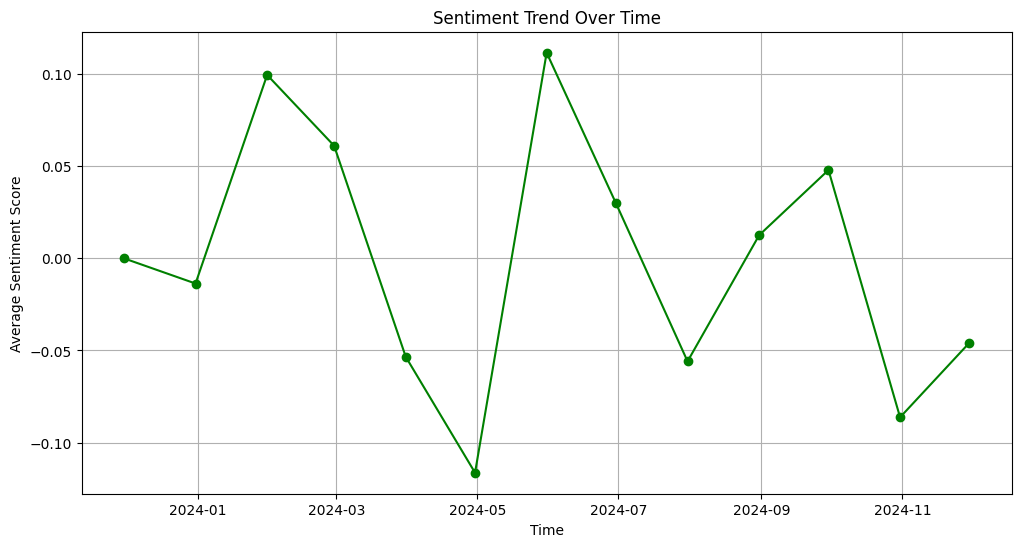

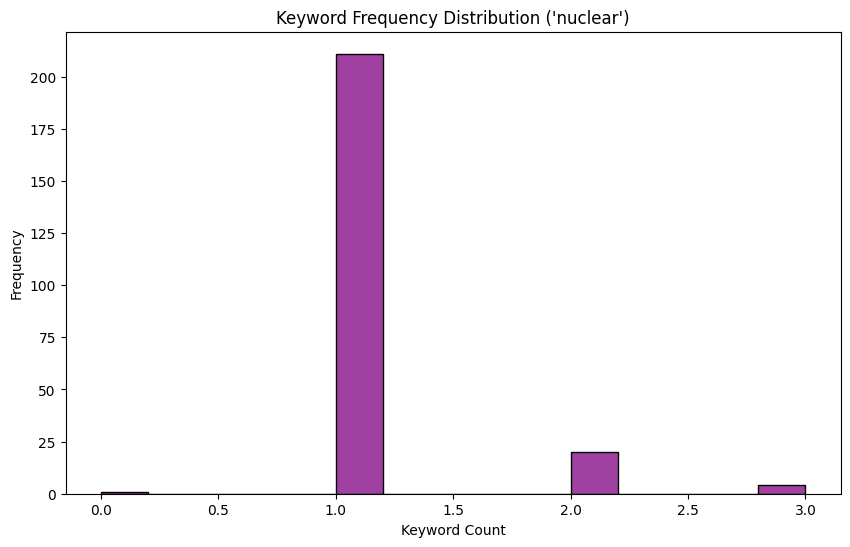

C:\Users\brian\AppData\Local\Temp\ipykernel_14396\2719759410.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="keyword_count", y="sentiment", palette="viridis")


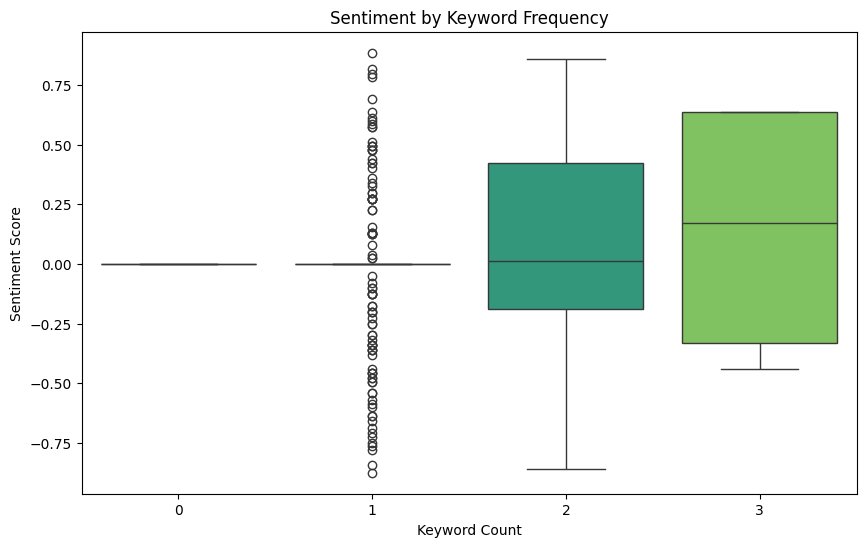

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
df = pd.read_excel("nuclear_power_sentiment.xlsx")

# Convert 'created' to datetime
df["created"] = pd.to_datetime(df["created"], unit="s")

# Inspect the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["sentiment"], kde=True, bins=20, color="blue")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Sentiment by Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="score", y="sentiment", hue="sentiment", palette="coolwarm")
plt.title("Sentiment vs. Score")
plt.xlabel("Score")
plt.ylabel("Sentiment Score")
plt.show()

# Time-based Sentiment Trends
plt.figure(figsize=(12, 6))
sentiment_trend = df.resample("M", on="created")["sentiment"].mean()
plt.plot(sentiment_trend, marker="o", linestyle="-", color="green")
plt.title("Sentiment Trend Over Time")
plt.xlabel("Time")
plt.ylabel("Average Sentiment Score")
plt.grid()
plt.show()

# Keyword Analysis: Count occurrences of 'nuclear' in text
df["keyword_count"] = df["text"].str.lower().str.count("nuclear")
plt.figure(figsize=(10, 6))
sns.histplot(df["keyword_count"], bins=15, kde=False, color="purple")
plt.title("Keyword Frequency Distribution ('nuclear')")
plt.xlabel("Keyword Count")
plt.ylabel("Frequency")
plt.show()

# Sentiment by Keyword Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="keyword_count", y="sentiment", palette="viridis")
plt.title("Sentiment by Keyword Frequency")
plt.xlabel("Keyword Count")
plt.ylabel("Sentiment Score")
plt.show()


## Analysis of Reddit Dataset for Nuclear Power Sentiment

The exploratory data analysis of the Reddit dataset revealed several notable insights. The dataset consists of 236 entries, all from Reddit, containing post titles and their associated sentiment scores. The sentiment scores range from -0.875, indicating strong negativity, to 0.8847, representing strong positivity. The average sentiment score is slightly negative at -0.007, suggesting a neutral to mildly negative overall sentiment. Most posts demonstrate modest opinions about nuclear power, with the 50th and 75th percentiles showing a more neutral stance. The highest sentiment scores were extremely positive, though these were less frequent.

The analysis also uncovered significant missing data in the `location` column, as Reddit does not provide location-based information due to privacy concerns. While this limits geographical analysis, it does not detract from the overall sentiment evaluation. The `score` column, representing the popularity or engagement level of posts, showed a wide range, with values from 0 to an impressive 35,915. This variability highlights differing levels of interest and engagement with nuclear power discussions on Reddit.

The sentiment distribution graph exhibited a near-normal distribution with a slight positive skew, aligning with the overall neutral sentiment trend. A scatter plot of sentiment versus score showed a mix of positive and negative receptivity to nuclear power, reflecting divided opinions within the platform's user base. The time-based sentiment analysis revealed a trend of increasing positivity over the year, transitioning from negative sentiments earlier to more favorable attitudes as the year progressed. This upward trend could correlate with growing interest in energy topics, potentially tied to the rising demand for data centers to support machine learning operations and other technological advancements.

It is worth noting that Twitter data was not included in this analysis due to limitations imposed by the platform's API, which now requires a paid subscription for extensive data collection. This restricted the ability to incorporate sentiment from Twitter users, potentially leaving out a significant portion of the social media discussion on nuclear power.

Despite these insights, the dataset poses limitations. The absence of location data restricts demographic analysis, and the reliance on Reddit introduces sampling bias, as the platform’s user base may not reflect broader population views. Additionally, the sentiment trends observed may require further context, such as external events or policies, to provide a more comprehensive understanding.

In summary, while the Reddit dataset offers valuable insights into public sentiment about nuclear power, the analysis underscores the need for additional data sources to validate these findings. The next step involves exploring sentiment trends within reputable news outlets to compare perspectives and deepen the understanding of nuclear power's public reception.


In [ ]:
from googlesearch import search
import requests
from bs4 import BeautifulSoup
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import re
import time

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()


# Function to clean text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    return text.lower().strip()


# Function to scrape article content
def scrape_google_results(query, max_results=10):
    articles = []
    print(f"Searching Google for: {query}")

    try:
        count = 0
        for url in search(query, lang="en"):
            try:
                response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}, timeout=10)
                soup = BeautifulSoup(response.text, "html.parser")

                # Extract the article title and text
                title = soup.find("title").text if soup.find("title") else "No Title"
                paragraphs = soup.find_all("p")
                content = " ".join(p.text for p in paragraphs)
                sentiment = sia.polarity_scores(clean_text(content))["compound"]

                articles.append({
                    "url": url,
                    "title": title,
                    "content": content[:500],  # Save only first 500 characters
                    "sentiment": sentiment,
                })

                print(f"Scraped: {title} | Sentiment: {sentiment}")
                count += 1
                if count >= max_results:
                    break  # Limit to max_results

                time.sleep(1)  # Be polite to servers
            except Exception as e:
                print(f"Error scraping {url}: {e}")
                continue

    except Exception as e:
        print(f"Error searching Google: {e}")

    return articles


# Comprehensive Keywords for Balanced Sentiment
keywords = [
    # Positive/neutral keywords
    "nuclear power", "nuclear reactors", "uranium",
    "power plants", "clean energy", "advanced nuclear energy",

    # Negative keywords
    "nuclear power is bad", "dangers of nuclear power", "radiation",
    "Chernobyl", "Fukushima", "why nuclear power is dangerous",
    "nuclear disaster", "radiation sickness", "nuclear accident"
]

# Compile search queries for the last 5 years
queries = [f"{keyword} after:2018" for keyword in keywords]

# Scrape articles from Google search results
all_articles = []

for query in queries:
    articles = scrape_google_results(query, max_results=10)  # Limit to 10 results per query
    all_articles.extend(articles)

# Save results to a DataFrame and export to CSV
if all_articles:
    file_name = "google_news_sentiment_analysis_no_location.csv"
    df = pd.DataFrame(all_articles)
    df.to_csv(file_name, index=False)
    print(f"Sentiment analysis complete. Results saved to '{file_name}' in the local directory.")
else:
    print("No articles were collected. Please check the scraping logic.")


### Exploratory Data Analysis (EDA) on Nuclear Power Sentiment

Now that I successfully scraped the web and assessed both positive and negative responses to nuclear power, the next step is to conduct another round of exploratory data analysis (EDA) on the findings. 

The analysis will focus on:
- **Basic Descriptive Statistics**: Summarizing the sentiment scores to understand the overall distribution of positivity and negativity in the data.
- **Time Series Analysis**: Examining trends in sentiment since 2018, particularly looking for changes in public receptivity to nuclear power over time. This is especially relevant with the advent of **small modular reactors (SMRs)** and their potential impact on the narrative surrounding nuclear energy.

The goal is to identify patterns and trends in public sentiment that might inform future discussions or policy decisions about nuclear power.


First 5 rows of the dataset:
                                                 url  \
0  https://www.iaea.org/newscenter/news/what-is-n...   
1  https://www.britannica.com/technology/nuclear-...   
2  https://world-nuclear.org/information-library/...   
3  https://www.iea.org/energy-system/electricity/...   
4  https://world-nuclear.org/information-library/...   

                                               title  \
0  What is Nuclear Energy? The Science of Nuclear...   
1  Nuclear power | Definition, Issues, & Facts | ...   
2  Nuclear Power in the USA - World Nuclear Assoc...   
3                                      Nuclear - IEA   
4  Nuclear Power Reactors - World Nuclear Associa...   

                                             content  sentiment  
0  If you would like to learn more about the IAEA...     0.9921  
1  Our editors will review what you’ve submitted ...     0.9951  
2  Total generation (in 2022): 4502 TWh Generatio...     1.0000  
3  Fossil Fuels Renewables Electr

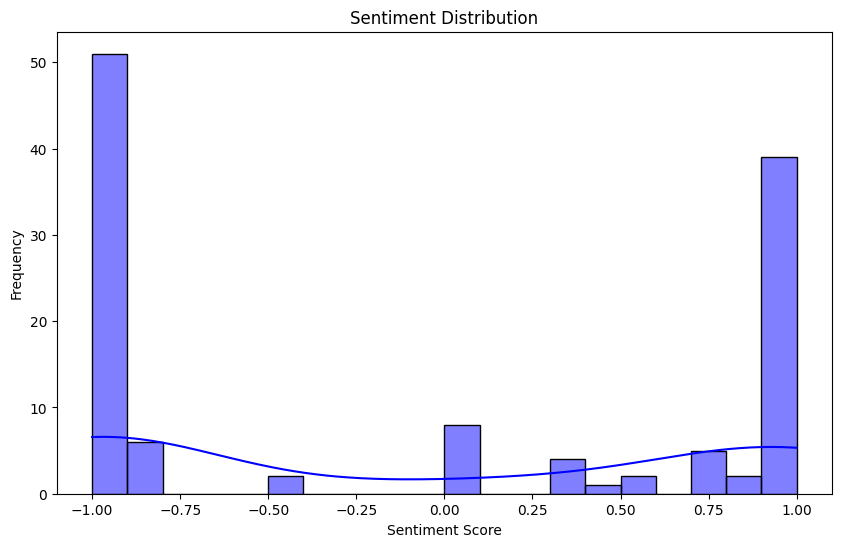

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_name = "news_sentiment_analysis_FINAL.csv"
df = pd.read_csv(file_name)

# Inspect the data
print("First 5 rows of the dataset:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Descriptive Statistics for Sentiment
print("\nDescriptive statistics for sentiment scores:")
print(df["sentiment"].describe())

# Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["sentiment"], kde=True, bins=20, color="blue")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Sentiment by Source
if "source" in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x="source", y="sentiment", palette="Set2")
    plt.title("Sentiment by News Source")
    plt.xlabel("News Source")
    plt.ylabel("Sentiment Score")
    plt.xticks(rotation=45)
    plt.show()

# Time Series Analysis
if "created" in df.columns:
    # Convert 'created' column to datetime
    df["created"] = pd.to_datetime(df["created"], errors="coerce")
    df = df.dropna(subset=["created"])  # Drop rows with invalid dates
    df.set_index("created", inplace=True)
    
    # Resample and calculate mean sentiment over time
    sentiment_trend = df.resample("M")["sentiment"].mean()
    plt.figure(figsize=(12, 6))
    plt.plot(sentiment_trend, marker="o", linestyle="-", color="green")
    plt.title("Sentiment Trend Over Time")
    plt.xlabel("Time")
    plt.ylabel("Average Sentiment Score")
    plt.grid()
    plt.show()

# Source vs Sentiment Count
if "source" in df.columns:
    plt.figure(figsize=(12, 6))
    source_counts = df.groupby("source")["sentiment"].count().sort_values(ascending=False)
    sns.barplot(x=source_counts.index, y=source_counts.values, palette="viridis")
    plt.title("Number of Articles by News Source")
    plt.xlabel("News Source")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


### Analysis of Results

What do our results reveal about the status of nuclear power in the US? 

The minimum sentiment score is **-1**, and the maximum is **1**, which corresponds to the full range used by the VADER sentiment analysis tool. The **mean sentiment score** is **-0.0813**, suggesting a slightly negative attitude towards nuclear power based on the sources we scraped.

When examining the graphs, we observe a **highly polarized landscape** on this topic, with sentiment skewing strongly positive or strongly negative. There is virtually no middle ground in the discourse surrounding nuclear power.

This polarization warrants further exploration, as it may reflect biases in the keywords selected for scraping. Additionally, there are other dimensions—such as geographic trends, education levels, or demographic factors—that could provide a more accurate representation of public sentiment toward nuclear power.


### Ethics Statement

#### **Purpose and Transparency**
The dataset was created to analyze public sentiments surrounding the use and future of nuclear power. Its purpose is to provide insights for individuals exploring opportunities in the nuclear power sector, whether for job security or potential investment. Additionally, the dataset can be utilized by public servants to gauge public opinion on nuclear power-related issues. 

The dataset was compiled primarily from open sources, and appropriate API permissions and rules were followed. Proper web scraping techniques were employed while adhering to all platform terms of service.

#### **Privacy and Anonymity**
Every effort was made to ensure privacy and anonymity:
- No personally identifiable information (PII) was collected or stored.
- Content from social media platforms, including Reddit, was aggregated without linking it to specific users.
- The dataset does not include usernames, profiles, or any other identifying information.

#### **Bias and Limitations**
- **Keyword Selection**: The keywords chosen for data collection may not have been broad enough to capture all relevant viewpoints.
- **Population Representation**: The dataset inherently excludes populations that may not have access to social media platforms or choose not to engage online.
- **Sentiment Analysis Tool**: The VADER sentiment analysis tool has limitations and may not be as advanced as other systems, potentially impacting the accuracy of sentiment scoring.

#### **Potential Misuse**
The dataset is not intended for:
- Commercial use.
- Propaganda or manipulation of public opinion.

The dataset may overrepresent the polarizing nature of the issue due to limitations in how data was collected and sourced. These factors should be considered when interpreting the results.


### Open Source Dataset: Nuclear Sentiment Analysis

The dataset for analyzing public sentiment on nuclear power, including its uses, benefits, and challenges, is now available as an open-source project.

#### **Access the Dataset**
You can explore and download the dataset on Hugging Face:
[Nuclear Sentiment Dataset on Hugging Face](https://huggingface.co/datasets/bmben23/nuclearsentiment)

#### **License**
This dataset is licensed under the [MIT License](https://opensource.org/licenses/MIT). You are free to use, modify, and distribute the dataset, provided you include the original license in any substantial reproductions or derivative works.

#### **Description**
The dataset was created by scraping publicly available online sources, including news outlets and social media platforms, to understand public sentiment toward nuclear power. Sentiment analysis was conducted using the VADER sentiment analysis tool.

#### **Usage**
This dataset can be used for:
- Research on public opinion and trends in nuclear power.
- Sentiment analysis studies.
- Educational purposes in data science, machine learning, and public policy.

#### **Contributions**
If you would like to contribute to this project or share your findings, feel free to reach out or fork the repository on Hugging Face.

